# 4. Insights & Anomaly Detection

In this final notebook, we interpret the clustering results by analyzing cluster profiles, identifying asset-level anomalies, and visualizing key patterns in the embedded UMAP space. The S&P 500 and FTSE 100 universes are analyzed **independently** for clarity and depth.

---


## Contents

1. [Load Clustered Data](#load-clustered-data)
2. [SP500 Analysis](#s-p-500-analysis)
   - [Compare Cluster Profiles](#sp500---compare-cluster-profiles)
   - [Detect Anomalous Assets](#sp500---detect-anomalous-assets)
   - [Visualize Patterns and Outliers](#sp500---visualize-patterns-and-outliers)
3. [FTSE100 Analysis](#ftse100-analysis)
   - [Compare Cluster Profiles](#ftse100---compare-cluster-profiles)
   - [Detect Anomalous Assets](#ftse100---detect-anomalous-assets)
   - [Visualize Patterns and Outliers](#ftse100---visualize-patterns-and-outliers)
4. [Summary Insights](#summary-insights)
---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Clustered Data

Load previously saved data containing:
- UMAP coordinates
- Cluster labels (from HDBSCAN)
- Summary statistics (Sharpe ratio, skewness, kurtosis, etc.)

In [2]:
df_clusters_sp500 = pd.read_pickle("../data/processed/df_clusters_sp500.pkl")
df_clusters_ftse100 = pd.read_pickle("../data/processed/df_clusters_ftse100.pkl")

## S&P 500 Analysis

### SP500 - Compare Cluster Profiles

- We compute the average values for key features across each cluster. This allows us to identify high-risk, low-risk, or uniquely-behaving groups.

In [3]:
cluster_summary_sp500 = pd.read_pickle("../data/processed/cluster_summary_sp500.pkl")
cluster_summary_ftse100 = pd.read_pickle("../data/processed/cluster_summary_ftse100.pkl")

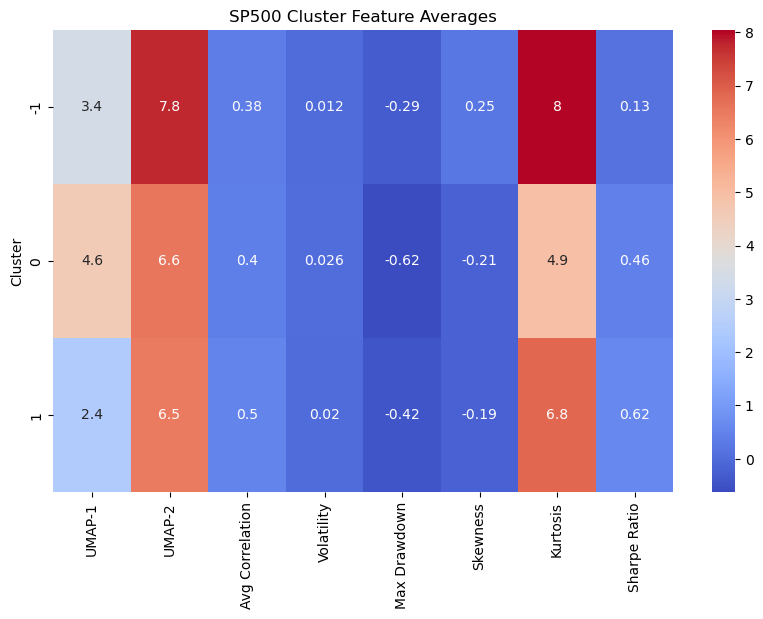

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary_sp500, annot=True, cmap="coolwarm")
plt.title("SP500 Cluster Feature Averages")
plt.show()

#### Findings:
- **Cluster 0** had moderate Sharpe ratios but worse drawdowns and more negative skewness.
- **Cluster 1** exhibited the **highest Sharpe ratio on average**, with lower volatility and milder skewness.
- **Outliers (-1 cluster)** had extreme kurtosis and were statistically irregular — likely the "noise" cluster.

---

### SP500 - Detect Anomalous Assets


Assets whose Sharpe ratios deviate significantly from their cluster's average are marked as anomalies.

In [5]:
df_clusters_sp500["Sharpe_Deviation"] = (
    df_clusters_sp500["Sharpe Ratio"] - 
    df_clusters_sp500.groupby("Cluster")["Sharpe Ratio"].transform("mean")
).abs()


threshold_sp500 = df_clusters_sp500["Sharpe_Deviation"].std()
anomalies_sp500 = df_clusters_sp500[df_clusters_sp500["Sharpe_Deviation"] > threshold_sp500]

In [6]:
anomalies_sp500

,Cluster,UMAP-1,UMAP-2,Avg Correlation,Volatility,Max Drawdown,Skewness,Kurtosis,Sharpe Ratio,Sharpe_Deviation
Ticker,,,,,,,,,,
AAPL,1,1.971493,6.370615,0.5336,0.0199,-0.3518,-0.1123,5.3572,0.7825,0.162300
JPM,1,2.309193,7.723323,0.4768,0.0204,-0.4675,0.0024,12.5127,0.4168,0.203400
NEE,0,4.513968,7.404597,0.4063,0.0192,-0.4907,-0.4462,7.8082,0.1981,0.262175
TSLA,0,4.709785,5.797446,0.3758,0.0422,-0.7988,-0.1118,3.2210,0.7914,0.331125


Assets whose Sharpe ratios deviate significantly from their cluster's average are marked as anomalies.

#### Detected Anomalies:

- | **TSLA** High return but uncorrelated behavior 
- | **NEE**  Low Sharpe in a better cluster 
- | **JPM**  Stable but significantly off-cluster 
- | **AAPL** High Sharpe, still deviant from cluster norm

### SP500 - Visualize Patterns and Outliers

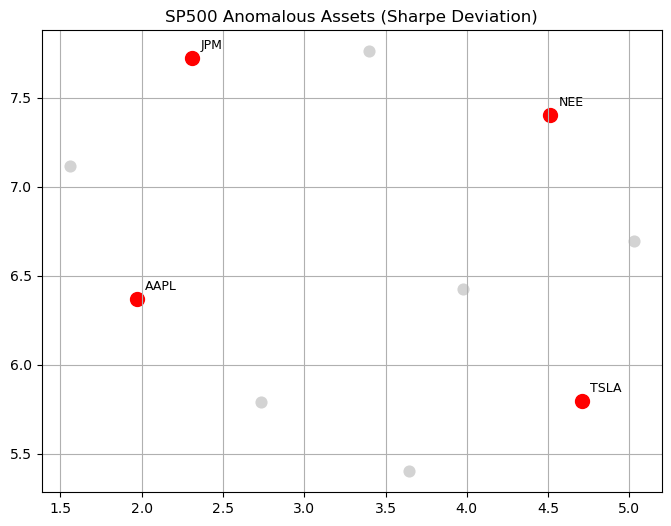

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clusters_sp500["UMAP-1"], df_clusters_sp500["UMAP-2"], c="lightgray", s=60)
plt.scatter(anomalies_sp500["UMAP-1"], anomalies_sp500["UMAP-2"], c="red", s=100)
for ticker in anomalies_sp500.index:
    plt.text(anomalies_sp500.loc[ticker, "UMAP-1"] + 0.05,
             anomalies_sp500.loc[ticker, "UMAP-2"] + 0.05,
             ticker, fontsize=9)
plt.title("SP500 Anomalous Assets (Sharpe Deviation)")
plt.grid(True)
plt.show()

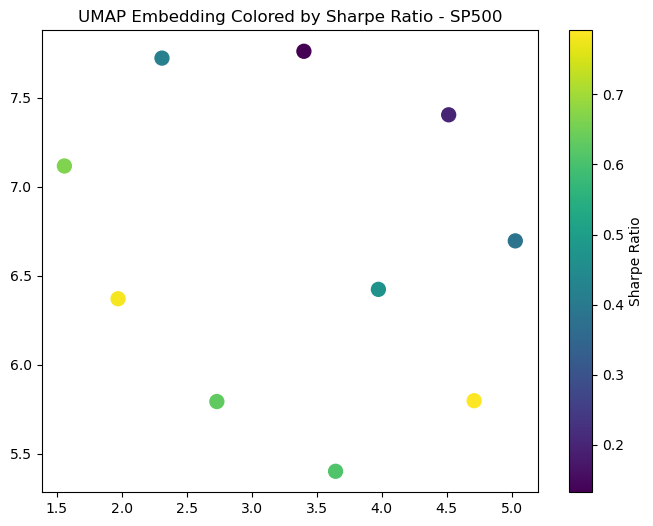

In [8]:
plt.figure(figsize=(8,6))
sc = plt.scatter(df_clusters_sp500["UMAP-1"], df_clusters_sp500["UMAP-2"], 
                 c=df_clusters_sp500["Sharpe Ratio"], cmap="viridis", s=100)
plt.colorbar(sc, label="Sharpe Ratio")
plt.title("UMAP Embedding Colored by Sharpe Ratio - SP500")
plt.show()

- Heatmaps show feature averages per cluster.
- UMAP scatterplot highlights anomaly points in red.
- Color mapping by Sharpe ratio helps interpret cluster quality visually.

---


## FTSE 100 Analysis

### FTSE100 - Compare Cluster Profiles

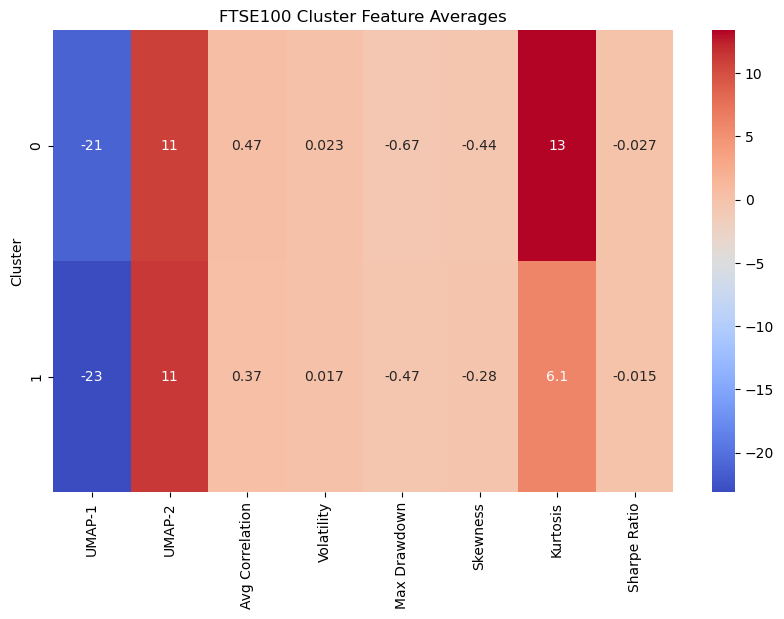

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary_ftse100, annot=True, cmap="coolwarm")
plt.title("FTSE100 Cluster Feature Averages")
plt.show()

#### Findings:
- **Cluster 0** had the **highest kurtosis and correlation**, but **most negative skew** and lowest Sharpe ratio.
- **Cluster 1** had **milder drawdowns and skewness**, and a slightly better (though still low) Sharpe ratio.

---

### FTSE100 - Detect Anomalous Assets

In [10]:
df_clusters_ftse100["Sharpe_Deviation"] = (
    df_clusters_ftse100["Sharpe Ratio"] - 
    df_clusters_ftse100.groupby("Cluster")["Sharpe Ratio"].transform("mean")
).abs()


threshold_ftse100 = df_clusters_ftse100["Sharpe_Deviation"].std()
anomalies_ftse100 = df_clusters_ftse100[df_clusters_ftse100["Sharpe_Deviation"] > threshold_ftse100]

In [11]:
anomalies_ftse100

,Cluster,UMAP-1,UMAP-2,Avg Correlation,Volatility,Max Drawdown,Skewness,Kurtosis,Sharpe Ratio,Sharpe_Deviation
Ticker,,,,,,,,,,
AZN_L,1,-24.475252,10.806849,0.2888,0.0158,-0.2868,-0.3794,4.2317,0.2496,0.264457
HSBA_L,1,-23.032648,11.912053,0.4389,0.0181,-0.5512,-0.2236,4.3712,0.1944,0.209257
VOD_L,1,-21.586176,12.247445,0.4081,0.0180,-0.6654,-0.5410,5.4747,-0.5372,0.522343


#### Detected Anomalies:


- | **VOD_L**  Highly positive anomaly, outperforms cluster by far
- | **AZN_L**  Positive deviation; isolated behavior
- | **HSBA_L** Moderate anomaly, still notable in context 

---

### FTSE100 - Visualize Patterns and Outliers

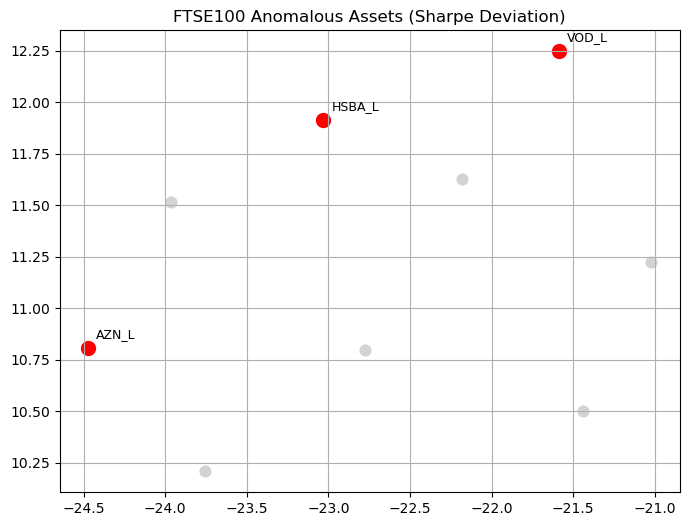

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clusters_ftse100["UMAP-1"], df_clusters_ftse100["UMAP-2"], c="lightgray", s=60)
plt.scatter(anomalies_ftse100["UMAP-1"], anomalies_ftse100["UMAP-2"], c="red", s=100)
for ticker in anomalies_ftse100.index:
    plt.text(anomalies_ftse100.loc[ticker, "UMAP-1"] + 0.05,
             anomalies_ftse100.loc[ticker, "UMAP-2"] + 0.05,
             ticker, fontsize=9)
plt.title("FTSE100 Anomalous Assets (Sharpe Deviation)")
plt.grid(True)
plt.show()

- UMAP scatter with red-highlighted anomalies.
- Cluster feature averages in heatmap form.
- Tabular support for anomaly metrics.

---

## Summary Insights


- **UMAP + HDBSCAN** provided **distinct market behavior groups** in both universes.
- Anomaly detection flagged assets with **abnormal return profiles** within their groups, potentially useful for **further investigation, hedging, or alpha-seeking strategies**.
- Patterns like **cluster-wide skewness or drawdown behavior** could inform **risk segmentation**.
- The approach scales well and can be adapted to any asset universe with sufficient statistical profiling.
---
